In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('https://storage.googleapis.com/the_public_bucket/wine-clustering.csv')

# Probemos con Hierarchical Clustering

Por supuesto, la estandarización primero

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003
min,-2.434,-1.433,-3.679,-2.671,-2.088,-2.107,-1.696,-1.868,-2.069,-1.634,-2.095,-1.895,-1.493
25%,-0.788,-0.659,-0.572,-0.689,-0.824,-0.885,-0.828,-0.740,-0.597,-0.795,-0.768,-0.952,-0.785
50%,0.061,-0.423,-0.024,0.002,-0.122,0.096,0.106,-0.176,-0.063,-0.159,0.033,0.238,-0.234
75%,0.836,0.670,0.698,0.602,0.510,0.809,0.849,0.610,0.629,0.494,0.713,0.789,0.758
max,2.260,3.109,3.156,3.155,4.371,2.540,3.063,2.402,3.485,3.435,3.302,1.961,2.971


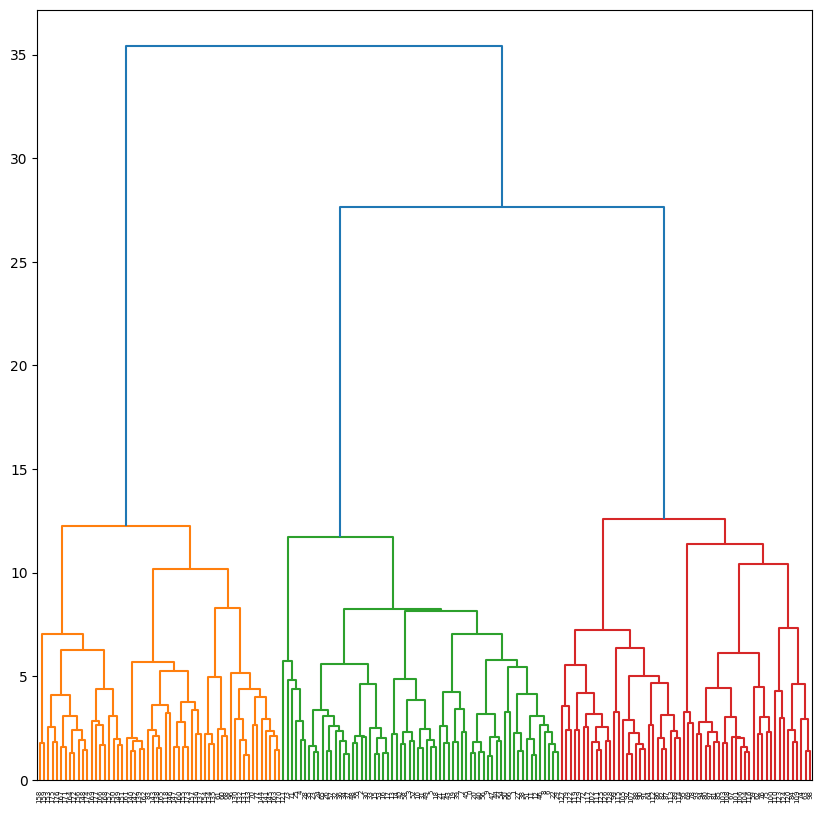

In [8]:
fig = plt.figure(figsize=(10,10))
dendogram_plot = dendrogram(linkage(scaled_data,method='ward'))
plt.show()

In [29]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward',metric='euclidean')
y_hc = hc.fit_predict(scaled_data)
print(silhouette_score(scaled_data,y_hc))

0.2774439826952265


In [30]:
pca = PCA()
pca.fit(scaled_data)
pca_data_scaled = pca.transform(scaled_data)
pca_data = pd.DataFrame(pca_data_scaled)
pca_data.drop([6,7,8,9,10,11,12],axis=1,inplace=True)

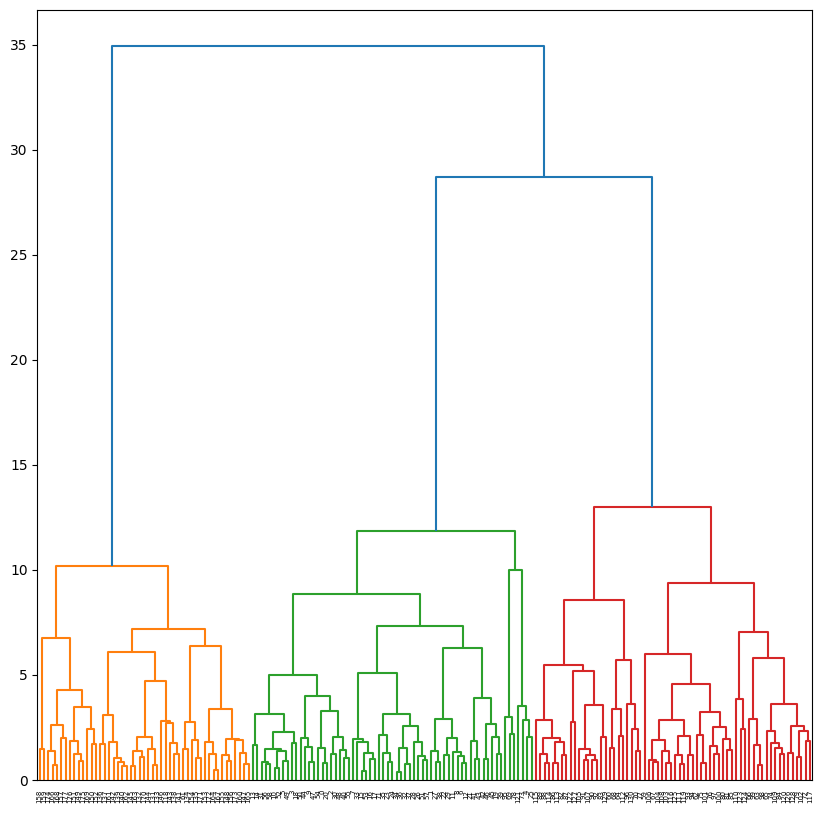

In [32]:
fig = plt.figure(figsize=(10,10))
dendogram_plot = dendrogram(linkage(pca_data,method='ward'))
plt.show()

In [35]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward',metric='euclidean')
y_hc = hc.fit_predict(pca_data)
print(silhouette_score(pca_data,y_hc))

0.33731591385589554
